# 7 KMeans算法

In [1]:
import pandas as pd

In [2]:
protein = pd.read_table("inputData/protein.txt",sep="\t")

In [3]:
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [4]:
print(protein.describe())

         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr&Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.700000   4.700000   4.90000

In [5]:
print(protein.columns)

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')


In [6]:
print(protein.shape)

(25, 10)


In [8]:
from sklearn.preprocessing import scale
sprotein = protein.drop(["Country"],axis=1)
protein_scale = scale(sprotein)

In [9]:
print(protein_scale)

[[ 0.08294065 -1.79475017 -2.22458425 -1.1795703  -1.22503282  0.9348045
  -2.29596509  1.24796771 -1.37825141]
 [-0.28297397  1.68644628  1.24562107  0.40046785 -0.6551106  -0.39505069
  -0.42221774 -0.91079027  0.09278868]
 [ 1.11969872  0.38790475  1.06297868  0.05573225  0.06479116 -0.5252463
   0.88940541 -0.49959828 -0.07694671]
 [-0.6183957  -0.52383718 -1.22005113 -1.2657542  -0.92507375  2.27395937
  -1.98367386  0.32278572  0.03621022]
 [-0.03903089  0.96810416 -0.12419682 -0.6624669  -0.6851065   0.19082957
   0.45219769 -1.01358827 -0.07694671]
 [ 0.23540507  0.8023329   0.69769391  1.13303099  1.68457011 -0.96233157
   0.3272812  -1.21918427 -0.98220215]
 [-0.43543839  1.02336124  0.69769391 -0.86356267  0.33475432 -0.71124003
   1.38907137 -1.16778527 -0.30326057]
 [-0.10001666 -0.82775116 -0.21551801  2.38269753  0.45473794 -0.55314536
   0.51465594 -1.06498727 -1.5479868 ]
 [ 2.49187852  0.55367601  0.33240914  0.34301192  0.42474204 -0.385751
   0.3272812  -0.34540128 

In [10]:
from sklearn.cluster import KMeans

In [11]:
NumOfClusters = range(1,20)
kmeans = [KMeans(n_clusters=i)  for i in NumOfClusters]

In [12]:
score = [kmeans[i].fit(protein_scale).score(protein_scale) for i in range(len(kmeans))]

In [13]:
score

[-225.00000000000003,
 -139.5073704483181,
 -110.40242709032154,
 -92.82606878570478,
 -76.43060222648339,
 -62.11420684088031,
 -53.607410267247076,
 -46.14848750402004,
 -41.98594335317263,
 -36.27917692689472,
 -30.429164116494334,
 -27.12551138685375,
 -22.385309171493148,
 -19.4666741570982,
 -16.197140919350673,
 -13.597310337368167,
 -10.995301496930022,
 -8.54546038166568,
 -6.704106008601111]

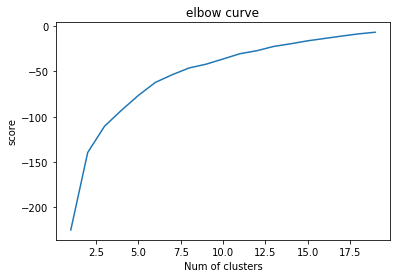

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumOfClusters,score)
plt.xlabel("Num of clusters")
plt.ylabel("score")
plt.title("elbow curve")
plt.show()

In [17]:
myKmeans = KMeans(algorithm="auto",n_clusters=5,n_init=10,max_iter=200)

In [18]:
myKmeans.fit(protein_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_kmeans = myKmeans.predict(sprotein)
print(y_kmeans)

[0 1 1 0 2 3 2 3 1 0 0 1 0 1 3 2 4 0 4 3 1 1 0 1 0]


In [22]:
def print_kmeans(k):
    for i in range(k):
        print("聚类",i)
        ls = []
        for index,value in enumerate(y_kmeans):
            if i==value:
                ls.append(index)
        print(protein.loc[ls,["Country","RedMeat","Fish","Fr&Veg"]])
print_kmeans(5)

聚类 0
       Country  RedMeat  Fish  Fr&Veg
0      Albania     10.1   0.2     1.7
3     Bulgaria      7.8   1.2     4.2
9       Greece     10.2   5.9     6.5
10     Hungary      5.3   0.3     4.2
12       Italy      9.0   3.4     6.7
17     Romania      6.2   1.0     2.8
22        USSR      9.3   3.0     2.9
24  Yugoslavia      4.4   0.6     3.2
聚类 1
        Country  RedMeat  Fish  Fr&Veg
1       Austria      8.9   2.1     4.3
2       Belgium     13.5   4.5     4.0
8        France     18.0   5.7     6.5
11      Ireland     13.9   2.2     2.9
13  Netherlands      9.5   2.5     3.7
20  Switzerland     13.1   2.3     4.9
21           UK     17.4   4.3     3.3
23    W Germany     11.4   3.4     3.8
聚类 2
           Country  RedMeat  Fish  Fr&Veg
4   Czechoslovakia      9.7   2.0     4.0
6        E Germany      8.4   5.4     3.6
15          Poland      6.9   3.0     6.6
聚类 3
    Country  RedMeat  Fish  Fr&Veg
5   Denmark     10.6   9.9     2.4
7   Finland      9.5   5.8     1.4
14   Norway   

# 8 随机森林算法

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simhei.ttf",size = 15)

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)

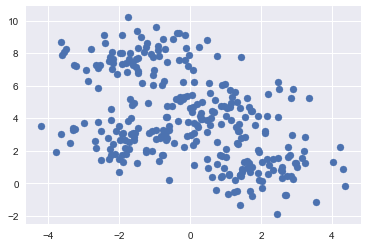

In [26]:
plt.scatter(X[:,0],X[:,1],cmap="rainbow")

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)
bag.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=0)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error
import numpy as np

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
print("最大房价",np.max(boston.target))
print("最小房价",np.min(boston.target))
print("平均房价",np.mean(boston.target))
x = boston.data
y = boston.target

最大房价 50.0
最小房价 5.0
平均房价 22.532806324110677


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=33)

In [13]:
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

In [14]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
print("随机森林回归的默认评估值为:",rfr.score(x_test,y_test))
print("随机森林回归的R_squared值为:",r2_score(y_test,rfr_y_predict))
print("随机森林回归的均方误差为:",mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rfr_y_predict)))
print("随机森林的平均绝对误差为:",median_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rfr_y_predict)))

随机森林回归的默认评估值为: 0.8261858524315823
随机森林回归的R_squared值为: 0.8261858524315822
随机森林回归的均方误差为: 13.477774015748027
随机森林的平均绝对误差为: 1.4099999999999966


In [ ]:
import pandas as pd
df_wine = pd.read_csv("inputData/wine.csv",)